**Chapter 2 Supervised Learning**

**2.3.3 Linear Classification Model**

In [1]:
import mglearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

import warnings
warnings.filterwarnings(action='ignore')

C:\Users\kh_le\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
C:\Users\kh_le\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


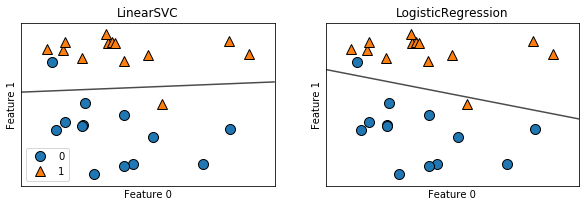

In [7]:
X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

두 모델이 사용하는 규제는 Ridge와 마찬가지로 L2 norm이다.


이 규제의 강도를 경저하는 매개변수는 C Value다. C값이 높아지면 규제가 감소한다. 다시말해, 높은 C값을 지정하면 LogisticRegression과 Linear SVC는 훈련 세트에 가능한 최대로 맞추려 하고, 반면에 C값을 낮추면 모델은 계수 벡터(w)가 0에 가까워지도록 만든다.

다르게 말하면, 매개변수 C는 값이 낮아지면 데이터 포인트중 다수에 맞추려고 하는 반면, C의 값을 높이면 개개의 데이터 포인트를 정확하게 분류하려고 노력하게 된다. 

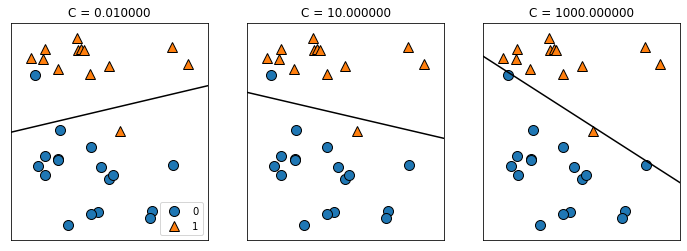

In [8]:
mglearn.plots.plot_linear_svc_regularization()

왼쪽 plot은 C가 아주 작다. 곧 규제가 많이 적용된 것. 클래스 0의 대부분이 아래에 있고, 클래스1의 대부분이 위에 있다.
규제가 강해진 모델은 비교적 수평에 가까운 결정을 만들었고 잘못 분류한 두 샘플에 민감해져 결정 경계가 기울어졌다. 

규제가 매우 강해진 오른쪽 plot은 결정 경계는 더 기울었고, 마침내 클래스 0의 모든 데이터 포인트를 올바로 분류했다. 이 데이터셋의 모든 포인트를 직선으로는 완벽히 분류할 수 없기 때문에 클래스 1의 포인트 하나는 여전히 잘못 분류되어 있다.

이는, 모든 데이터 포인트를 정확히 분류하려고 애썻지만, 클래스의 전체적인 배치를 잘 파악하지 못한 것. 곧 과적합의 형태

In [11]:
# C-value = 1

from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("Train Set Score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test  Set Score: {:.3f}".format(logreg.score(X_test, y_test)))

Train Set Score: 0.944
Test  Set Score: 0.958


In [12]:
# C-value = 100

logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Train Set Score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test  Set Score: {:.3f}".format(logreg100.score(X_test, y_test)))

Train Set Score: 0.958
Test  Set Score: 0.951


In [13]:
# C-value = 0.01

logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Train Set Score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test  Set Score: {:.3f}".format(logreg001.score(X_test, y_test)))

Train Set Score: 0.934
Test  Set Score: 0.930


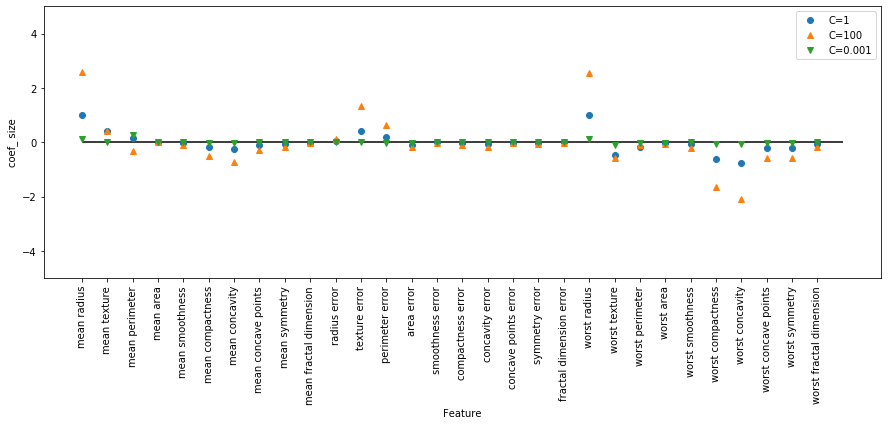

In [22]:
plt.figure(figsize=(15, 5))
plt.plot(logreg.coef_.T, 'o', label='C=1')
plt.plot(logreg100.coef_.T, '^', label='C=100')
plt.plot(logreg001.coef_.T, 'v', label='C=0.001')
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("coef_ size")
plt.legend()


LogisticRegression은 **L2규제**를 이용. 따라서, **Ridge**로 만든 모습과 비슷하다. 규제를 강화할수록 계수들은 0에 더 가깝게 만들지만 **완전히 0은 아님**.


In [27]:
# L1 Regularization, Score and Coef_ Plot => error

for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty='l1').fit(X_train, y_train)
    print("C={:.3f} L1 Logistic Regression Train Score: {:.2f}".format(C, lr_l1.score(X_train, y_train)))
    print("C={:.3f} L1 Logistic Regression Test Score: {:.2f}".format(C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))
    
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel("features")
plt.ylabel("Coef_ Size")

plt.ylim(-5, 5)
plt.legend(loc=3)
    
    

ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

C=0.001 L1 Logistic Regression Train Score: 0.95
C=0.001 L1 Logistic Regression Test Score: 0.94
C=1.000 L1 Logistic Regression Train Score: 0.94
C=1.000 L1 Logistic Regression Test Score: 0.96
C=100.000 L1 Logistic Regression Train Score: 0.96
C=100.000 L1 Logistic Regression Test Score: 0.95


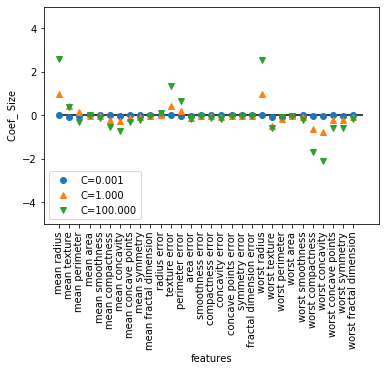

In [28]:
# L2 Regularization, Score and Coef_ Plot

for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty='l2').fit(X_train, y_train)
    print("C={:.3f} L1 Logistic Regression Train Score: {:.2f}".format(C, lr_l1.score(X_train, y_train)))
    print("C={:.3f} L1 Logistic Regression Test Score: {:.2f}".format(C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))
    
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel("features")
plt.ylabel("Coef_ Size")

plt.ylim(-5, 5)
plt.legend(loc=3)
    
    

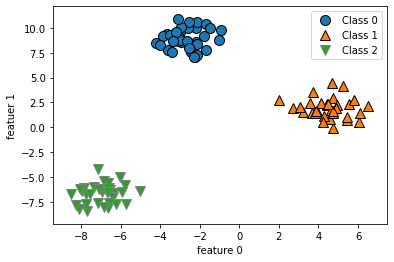

In [31]:
# Multiclass Classification (Linear Model)

from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("feature 0")
plt.ylabel("featuer 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

In [35]:
linear_svm = LinearSVC().fit(X, y)
print("계수 배열의 크기: ", linear_svm.coef_.shape)
print("절편 배열의 크기: ", linear_svm.intercept_.shape)

계수 배열의 크기:  (3, 2)
절편 배열의 크기:  (3,)


coef_ 행은 세개의 클래스에 각각 대응하는 계수 벡터를 담고 있으며, 열은 각 특성에 따른 계수 값(이 데이터셋에서는 2개)을 가지고 있다.

intercept_는 각 클래스의 절편을 담은 1차원 벡터이다

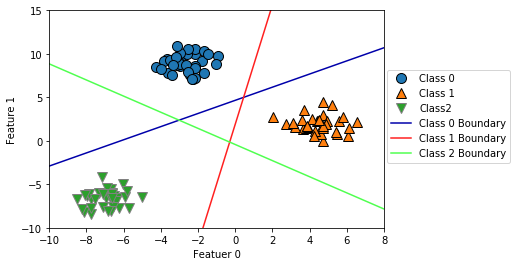

In [37]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)

plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Featuer 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0 ", "Class 1", "Class2",  "Class 0 Boundary", "Class 1 Boundary", "Class 2 Boundary"], loc=[1.01, 0.3])

Text(0, 0.5, 'Feature 1')

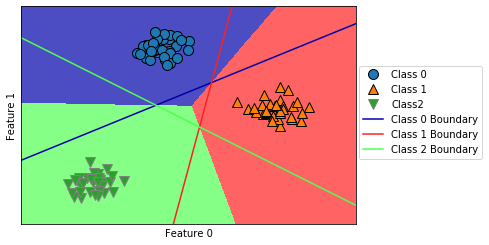

In [38]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)

plt.legend(["Class 0 ", "Class 1", "Class2",  "Class 0 Boundary", "Class 1 Boundary", "Class 2 Boundary"], loc=[1.01, 0.3])
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

**장단점과 매개변수**

1. 선형모델의 주요 매개변수는 회귀모델에서 alpha, LinerSVC와 LogisticRegression에서는 C.
- alpha값이 클수록, C 값이 작을수록 모델은 단순해진다. 특별히 회귀 모델에서 이 매개변수를 조정하는 일은 매우 중요. 
- 보통 C와 alpha는 log scale로 최적치를 정한다. (보통자릿수가 바뀌도록 10배씩 변경 즉, 0.01, 0.1, 1, 10)
- 만일, 중요한 특성이 많지 않다고 판단되면, L1 Regularization 이용. 또한, 해석이 중요한 요소일때에도 사용.

2. 선형모델은 학습속도가 빠르고 예측도 빠르다. 매우 큰 데이터셋과 희소학 데이터셋에서도 잘 작동함.
- 기본설정 보다 빠르게 처리하도록 LogisticRegression모델의 Ridge에 solver='sag' 옵션을 주는 방법이 있음. (확률적경사하강법)
- 확률적경사하강법은 (Stochastic Average Gradient descent) 경사하강법과 유사하나, 반복이 진행될 때 이전에 구한 모든 경사의 평균을 사용하여 계수를 갱신하는 차이점이 있음.
- 혹은, 선형 모델의 대용량 버전인 SGDClassifier와 SGDRegressor를 이용하는 방법도 있음.

3. 회귀와 분류에서 본 공식을 사용해 예측이 이루어짐. 곧, 이해가 쉽다는 장점이 있다. 
- 하지만 계수의 값들이 왜 그런지 명확하지 않을때 종종있다. 또한, 특성들이 서로 깊게 연관되어 있을 때는 더 그렇다.

4. 선형모델은 샘플에 비해 트성이 많을 때 잘 작동한다. 그러나 저차원의 데이터셋에서는 다른 모델의 일반화 성능이 더 좋다. 예를들면 "Kernel Support Vector Machine" 등.